# TP images: corrélation et recherche de motif
## Données numériques - 2022-23
### Diane Lingrand (Diane.Lingrand@univ-cotedazur.fr)

In [2]:
from skimage import io
from skimage import data
from skimage import transform
from skimage.color import rgb2gray
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import math
import seaborn

In [3]:
%matplotlib inline

## Cross Correlation

In [4]:
#voici les imagettes utilisées dans les slides
imageTest = np.array([[4,5,6,7,8],[4,5,8,9,10],[40,50,80,90,100],[43,48,88,92,5]])
motifTest = np.array([[4,5,6],[4,5,8],[40,50,80]])

[[  4   5   6   7   8]
 [  4   5   8   9  10]
 [ 40  50  80  90 100]
 [ 43  48  88  92   5]]
[[ 4  5  6]
 [ 4  5  8]
 [40 50 80]]


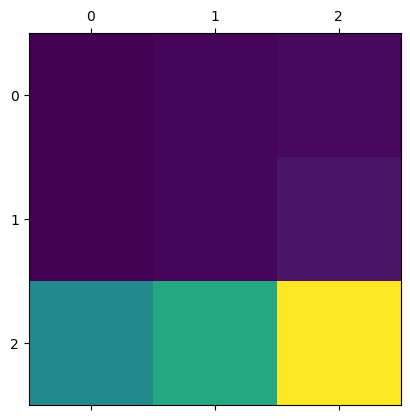

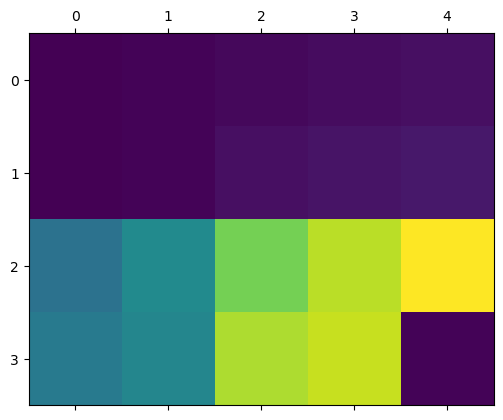

In [5]:
print(imageTest)
print(motifTest)
plt.matshow(motifTest)
plt.matshow(imageTest)

**Question 1:** Ecrire le code de la fonction *correlationWithoutNorm* qui prend en entrée 2 tableaux 2d de valeurs: une image (en niveau de gris) et un motif et retourne l'image de correlation sans aucune normalisation.

In [6]:
def crossCorrelationWithoutNorm(im, mo):    
    pass


**Question 2:** Ecrire le code de la fonction *correlation* qui prend en entrée 2 tableaux 2d de valeurs: une image (en niveau de gris) et un motif et retourne l'image de correlation avec les normalisations vues en cours. Il pourra s'agir d'une implémentation naïve.

In [7]:
def crossCorrelation(img, pattern):
    h_pattern, w_pattern = pattern.shape[:2]
    h_pattern2, w_pattern2 = h_pattern // 2, w_pattern // 2  # assuming pattern of odd width and height
    him, wim = img.shape[:2]
    res = np.zeros(img.shape)
    pattern = pattern - np.mean(pattern)
    stdPat = math.sqrt(np.mean(pattern * pattern))
    if stdPat == 0:
        return res
    pattern /= stdPat
    for j in range(w_pattern2, wim - w_pattern2):
        for i in range(h_pattern2, him - h_pattern2):
            # mean of roi
            meanRoi = 0
            for l in range(w_pattern):
                for k in range(h_pattern):
                    meanRoi += img[i + k - h_pattern2][j + l - w_pattern2]
            meanRoi /= h_pattern * w_pattern
            # standard dev of roi
            stdRoi = 0
            for l in range(w_pattern):
                for k in range(h_pattern):
                    stdRoi += (img[i + k - h_pattern2][j + l - w_pattern2] -
                               meanRoi)**2
            stdRoi = math.sqrt(stdRoi / h_pattern / w_pattern)
            if stdRoi == 0:
                res[i][j] = 0
            # cross correlation
            else:
                for l in range(w_pattern):
                    for k in range(h_pattern):
                        res[i][j] += (
                            img[i + k - h_pattern2][j + l - w_pattern2] -
                            meanRoi) * pattern[k][l]
            res[i][j] /= stdRoi
    res /= h_pattern * w_pattern
    return res

**Question 3:** Tester la fonction précédente. Affichez les résultats. Améliorer éventuellement l'implémentation pour accélerer les calculs. Il sera possible et peut-être nécessaire de revenir à cette question plus tard (question 5).

In [8]:

def crossCorrelation2(img, pattern):
    h_pattern, w_pattern = pattern.shape[:2]

    # Make sure pattern dimensions are odd
    if h_pattern % 2 == 0:
        pattern = pattern[:-1,:]
    if w_pattern % 2 == 0:
        pattern = pattern[:,:-1]

    h_pattern, w_pattern = pattern.shape[:2]
    
    h_pattern2, w_pattern2 = h_pattern // 2, w_pattern // 2  # assuming pattern of odd width and height
    him, wim = img.shape[:2]
    res = np.zeros(img.shape)
    pattern = pattern - np.mean(pattern)
    stdPat = math.sqrt(np.mean(pattern * pattern))
    if stdPat == 0:
        return res
    pattern /= stdPat
    for j in range(w_pattern2, wim - w_pattern2):
        for i in range(h_pattern2, him - h_pattern2):
            # mean of roi
            meanRoi = np.mean(img[i - h_pattern2:i + h_pattern2 + 1, j - w_pattern2:j + w_pattern2 + 1])
            # standard dev of roi
            stdRoi = np.std(img[i - h_pattern2:i + h_pattern2 + 1, j - w_pattern2:j + w_pattern2 + 1])

            if stdRoi == 0:
                res[i][j] = 0
                continue

            # cross correlation
            res[i][j] = np.sum((img[i - h_pattern2:i + h_pattern2 + 1, j - w_pattern2:j + w_pattern2 + 1] - meanRoi) * pattern) / stdRoi
    res /= h_pattern * w_pattern
    return res


In [9]:
res = crossCorrelation(imageTest, motifTest)
res2 = crossCorrelation2(imageTest, motifTest)
print(res)
assert np.allclose(res, res2) # not exactly the same because of floating point precision

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.97916391  0.96322644  0.        ]
 [ 0.          0.59679602  0.55167288 -0.06123023  0.        ]
 [ 0.          0.          0.          0.          0.        ]]


## logo dans image

**Question 4:** Choisissez une image qui comporte plusieurs instances d'un motif et conservez l'image et une copie du motif. Modifiez la cellule suivante en conséquence. Soit les images sont en niveaux de gris, soit il faudra les convertir.

In [10]:
img = io.imread('./img.jpg')
logo = io.imread('./logo.jpg')

# if image is too big, resize it
def downscale(img, threshold):
    if img.shape[0] > threshold:
        img = transform.resize(img, (threshold, img.shape[1] * threshold // img.shape[0]))
    if img.shape[1] > threshold:
        img = transform.resize(img, (img.shape[0] * threshold // img.shape[1], threshold))
    return img

#img = downscale(img, 300)
#logo = downscale(logo, 50)

In [11]:
# conversion en niveaux de gris
img = rgb2gray(img[:,:,0:3])
logo = rgb2gray(logo[:,:,0:3])

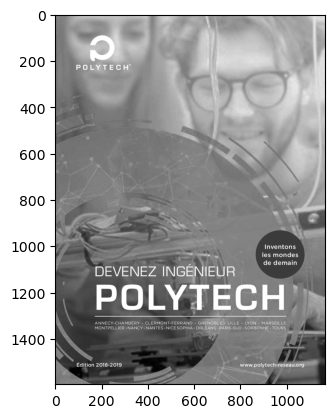

In [12]:
plt.imshow(img, cmap=plt.cm.gray)

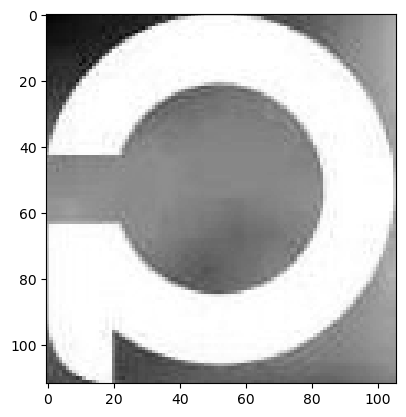

In [13]:
plt.imshow(logo, cmap=plt.cm.gray)

**Question 5:** Calculez la carte de corrélation et affichez la selon une carte de couleurs chaudes. Si les calculs sont trop longs, revenir à la question 3.

In [14]:
res = crossCorrelation2(img, logo)


<AxesSubplot:>

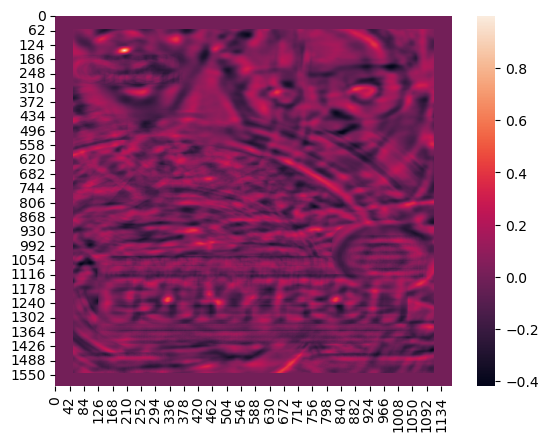

In [22]:
plt.matshow(res > 0.5, cmap=plt.cm.gray)

**Question 6:** Quel est le max? Où est-il situé?

In [16]:
# pour vous

**Question 7:** Où sont les valeurs de forte corrélation? Il faut déterminer un seuil: 0.5? 0.8? 0.9? Ensuite, différentes possibilités de visualisation sont possibles:
- afficher la carte de corrélation seuillée en transparence sur l'image originale ou bien 
- entourer les zones concernées sur la carte de corrélation ou encore 
- sur l'image originale.

In [17]:
#pour vous